<a href="https://colab.research.google.com/github/farahhkhalil/Codealpha/blob/main/stockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv(r"/content/AAPL.csv")

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-1990,0.314732,0.334821,0.312500,0.332589,0.266423,183198400
1,03-01-1990,0.339286,0.339286,0.334821,0.334821,0.268211,207995200
2,04-01-1990,0.341518,0.345982,0.332589,0.335938,0.269106,221513600
3,05-01-1990,0.337054,0.341518,0.330357,0.337054,0.270000,123312000
4,08-01-1990,0.334821,0.339286,0.330357,0.339286,0.271788,101572800
5,09-01-1990,0.339286,0.339286,0.330357,0.335938,0.269106,86139200
6,10-01-1990,0.335938,0.335938,0.319196,0.321429,0.257484,199718400
7,11-01-1990,0.323661,0.323661,0.308036,0.308036,0.246755,211052800
8,12-01-1990,0.305804,0.310268,0.301339,0.308036,0.246755,171897600
9,15-01-1990,0.308036,0.319196,0.305804,0.305804,0.244967,161739200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8042 entries, 0 to 8041
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8042 non-null   object 
 1   Open       8042 non-null   float64
 2   High       8042 non-null   float64
 3   Low        8042 non-null   float64
 4   Close      8042 non-null   float64
 5   Adj Close  8042 non-null   float64
 6   Volume     8042 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 439.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8.042000e+03
mean,16.351917,16.525066,16.178668,16.358983,15.594377,3.831832e+08
std,29.698129,30.021799,29.380971,29.717860,29.448485,3.633095e+08
min,0.114955,0.118304,0.113839,0.115513,0.099037,2.396800e+06
25%,0.367266,0.375000,0.358929,0.367188,0.308924,1.478439e+08
50%,2.111071,2.138393,2.058393,2.106428,1.805978,2.664242e+08
75%,21.204196,21.363661,20.989554,21.170268,18.389792,4.808804e+08
max,161.679993,165.699997,161.000000,165.300003,165.300003,7.421641e+09


In [ ]:
df_n=df[['Date','Open','Close']]

In [ ]:
df_n

,Date,Open,Close
0,02-01-1990,0.314732,0.332589
1,03-01-1990,0.339286,0.334821
2,04-01-1990,0.341518,0.335938
3,05-01-1990,0.337054,0.337054
4,08-01-1990,0.334821,0.339286
...,...,...,...
8037,23-11-2021,161.119995,161.410004
8038,24-11-2021,160.750000,161.940002
8039,26-11-2021,159.570007,156.809998
8040,29-11-2021,159.369995,160.240005


In [ ]:
df_n

,Date,Open,Close
0,02-01-1990,0.314732,0.332589
1,03-01-1990,0.339286,0.334821
2,04-01-1990,0.341518,0.335938
3,05-01-1990,0.337054,0.337054
4,08-01-1990,0.334821,0.339286
...,...,...,...
8037,23-11-2021,161.119995,161.410004
8038,24-11-2021,160.750000,161.940002
8039,26-11-2021,159.570007,156.809998
8040,29-11-2021,159.369995,160.240005


In [ ]:
df_n['Date']=pd.to_datetime(df_n['Date'].apply(lambda x: x.split(" ")[0]))

In [ ]:
type(df['Date'][0])

str

In [ ]:
df['Date'][0]

'02-01-1990'

In [ ]:
type(df_n['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df_n['Date'][0]

Timestamp('1990-02-01 00:00:00')

In [ ]:
df_n.set_index('Date',drop=True,inplace=True)

In [ ]:
df_n


,Open,Close
Date,,
1990-02-01,0.314732,0.332589
1990-03-01,0.339286,0.334821
1990-04-01,0.341518,0.335938
1990-05-01,0.337054,0.337054
1990-08-01,0.334821,0.339286
...,...,...
2021-11-23,161.119995,161.410004
2021-11-24,160.750000,161.940002
2021-11-26,159.570007,156.809998


**Data visualization**

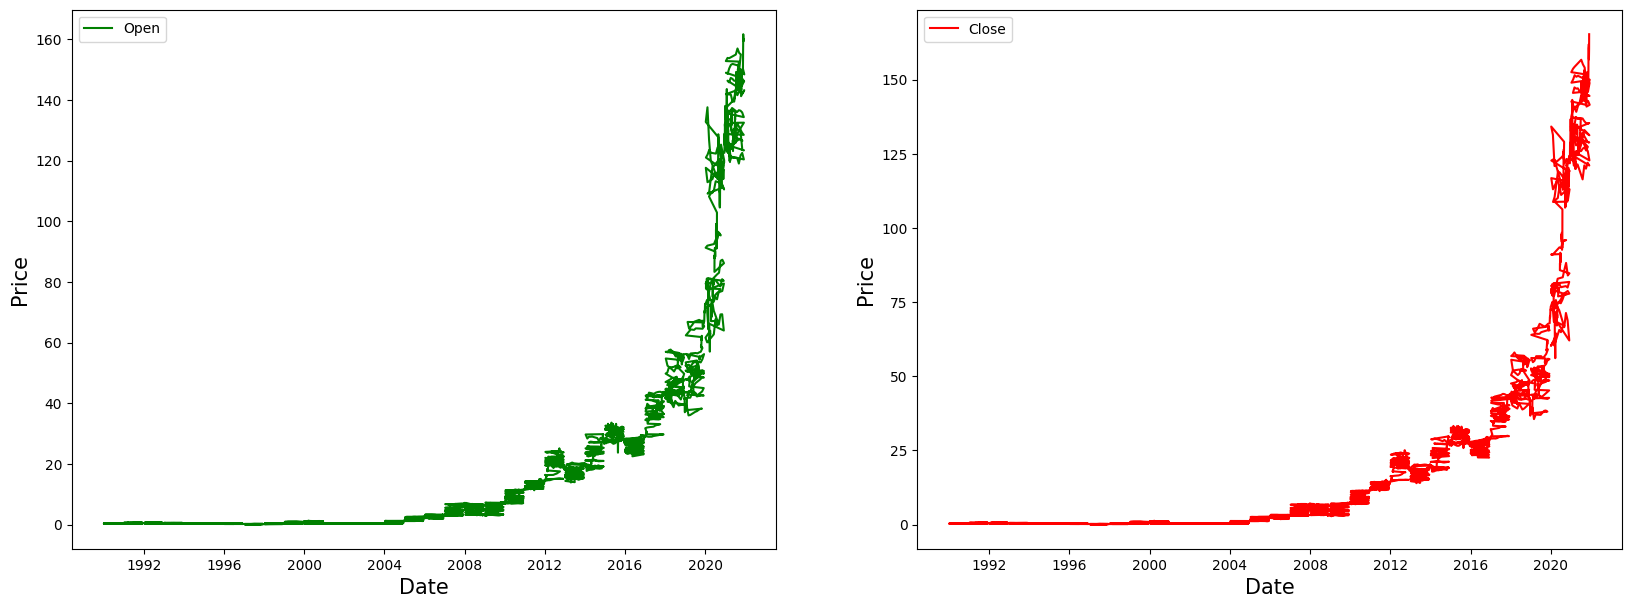

In [ ]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df_n['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df_n['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
df_n[df_n.columns] = MMS.fit_transform(df_n)

In [ ]:
df_n

,Open,Close
Date,,
1990-02-01,0.001237,0.001314
1990-03-01,0.001388,0.001328
1990-04-01,0.001402,0.001334
1990-05-01,0.001375,0.001341
1990-08-01,0.001361,0.001355
...,...,...
2021-11-23,0.996534,0.976451
2021-11-24,0.994244,0.979659
2021-11-26,0.986940,0.948603


In [ ]:
df_n.shape


(8042, 2)

In [ ]:
training_size = round(len(df_n) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

6434

In [ ]:
train_data = df_n[:training_size]
test_data  = df_n[training_size:]

train_data.shape, test_data.shape

((6434, 2), (1608, 2))

In [ ]:
# Function to create sequence of data for training and testing
def create_sequence(dataset):
                sequences = []
                labels = []
                start_idx = 0
                for stop_idx in range(50,len(dataset)):                   # Selecting 50 rows at a time
                    sequences.append(dataset.iloc[start_idx:stop_idx])
                    labels.append(dataset.iloc[stop_idx])
                    start_idx += 1
                return (np.array(sequences),np.array(labels))

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [ ]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((6384, 50, 2), (6384, 2), (1558, 50, 2), (1558, 2))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
200/200 [==============================] - 16s 57ms/step - loss: 1.0712e-04 - mean_absolute_error: 0.0039 - val_loss: 0.0033 - val_mean_absolute_error: 0.0325
Epoch 2/80
200/200 [==============================] - 10s 49ms/step - loss: 7.3129e-06 - mean_absolute_error: 0.0016 - val_loss: 0.0041 - val_mean_absolute_error: 0.0369
Epoch 3/80
200/200 [==============================] - 10s 51ms/step - loss: 6.9022e-06 - mean_absolute_error: 0.0016 - val_loss: 0.0031 - val_mean_absolute_error: 0.0312
Epoch 4/80
200/200 [==============================] - 9s 45ms/step - loss: 7.2615e-06 - mean_absolute_error: 0.0017 - val_loss: 0.0043 - val_mean_absolute_error: 0.0403
Epoch 5/80
200/200 [==============================] - 10s 50ms/step - loss: 6.4633e-06 - mean_absolute_error: 0.0016 - val_loss: 0.0033 - val_mean_absolute_error: 0.0336
Epoch 6/80
200/200 [==============================] - 10s 49ms/step - loss: 6.4783e-06 - mean_absolute_error: 0.0016 - val_loss: 0.0023 - val_mean_abso

In [ ]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

49/49 [==============================] - 3s 22ms/step


array([[0.17250374, 0.16812855],
       [0.17319758, 0.1688166 ],
       [0.17441949, 0.17002018],
       [0.17231221, 0.16797134],
       [0.16847368, 0.16418675]], dtype=float32)

In [ ]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[27.985529, 27.887741],
       [28.09763 , 28.001396],
       [28.295048, 28.200209],
       [27.954586, 27.861774],
       [27.334412, 27.236616]], dtype=float32)

In [ ]:
# Merging actual and predicted data for better visualization

gs_slic_data = pd.concat([df_n.iloc[-len(test_inverse_predicted):].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=df_n.iloc[-len(test_inverse_predicted):].index)], axis=1)

In [ ]:
gs_slic_data[['open','close']] = MMS.inverse_transform(gs_slic_data[['Open','Close']]) # Inverse scaling


In [ ]:
gs_slic_data['2021-06-09	':'2021-06-16']

,Open,Close,open_predicted,close_predicted,open,close
Date,,,,,,
2021-06-14,0.790425,0.789205,110.858093,111.094170,127.820000,130.479996
2021-06-15,0.803547,0.784120,112.783783,113.034210,129.940002,129.639999
2021-06-16,0.806208,0.787208,113.310471,113.598633,130.369995,130.149994
2021-06-10,0.862532,0.858946,119.620346,120.094093,139.470001,142.000000


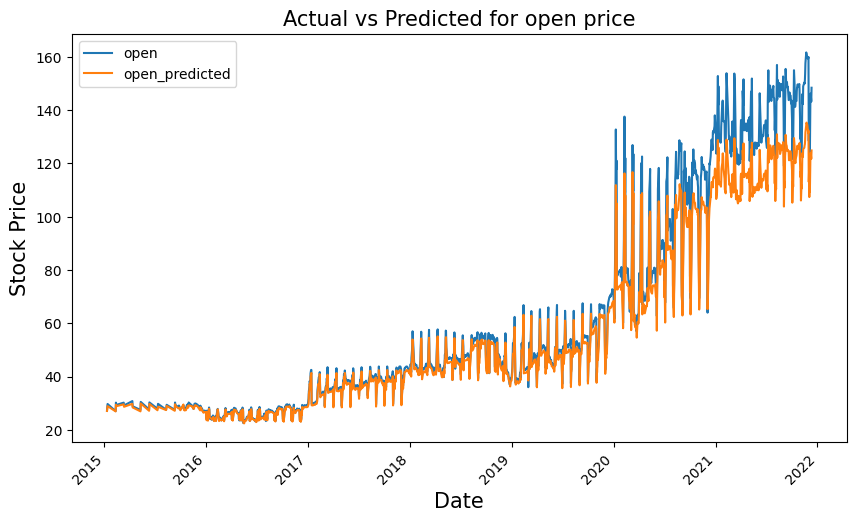

In [ ]:
gs_slic_data[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

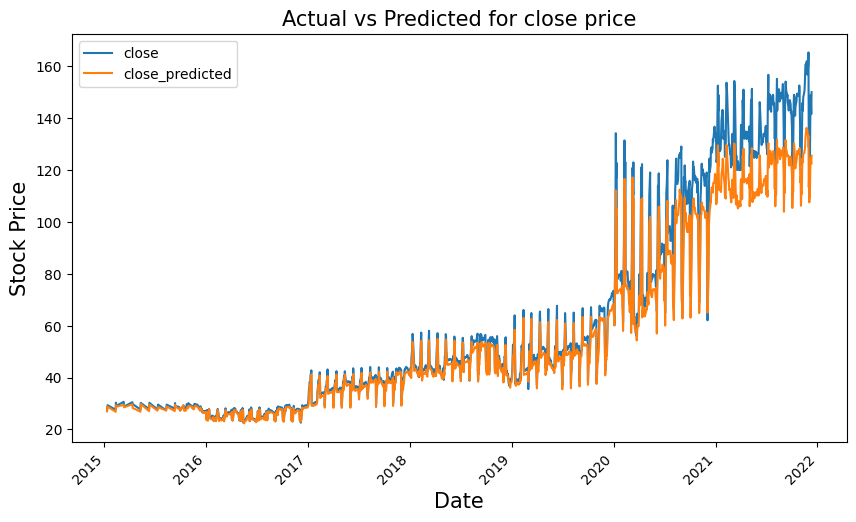

In [ ]:
gs_slic_data[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()


In [ ]:
# Creating a dataframe and adding 10 days to existing index

gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))

In [ ]:
gs_slic_data['2021-06-09	':'2021-06-16']

,Open,Close,open_predicted,close_predicted,open,close
2021-06-14,0.790425,0.789205,110.858093,111.094170,127.820000,130.479996
2021-06-15,0.803547,0.784120,112.783783,113.034210,129.940002,129.639999
2021-06-16,0.806208,0.787208,113.310471,113.598633,130.369995,130.149994
2021-06-10,0.862532,0.858946,119.620346,120.094093,139.470001,142.000000


In [ ]:
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [ ]:
curr_seq = test_seq[-1:]
for i in range(-10,0):
    up_pred = model.predict(curr_seq)
    upcoming_prediction.iloc[i] = up_pred
    curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
    curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 87ms/step


In [ ]:
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

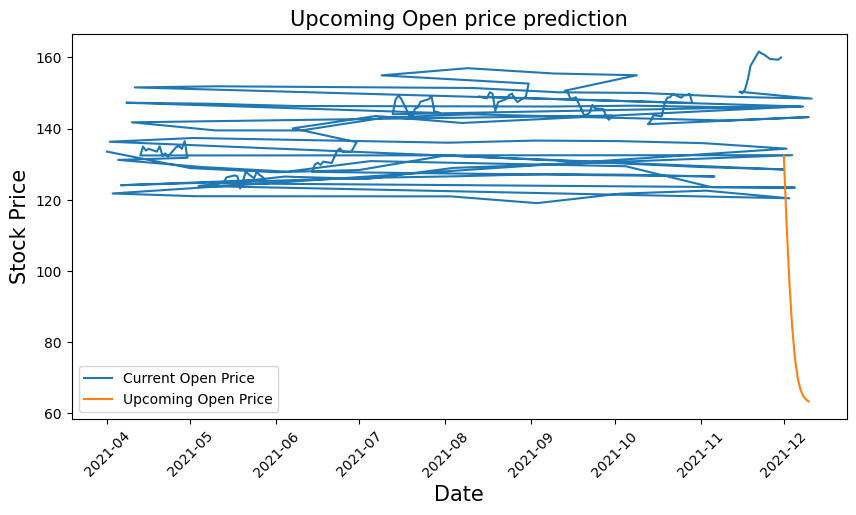

In [ ]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

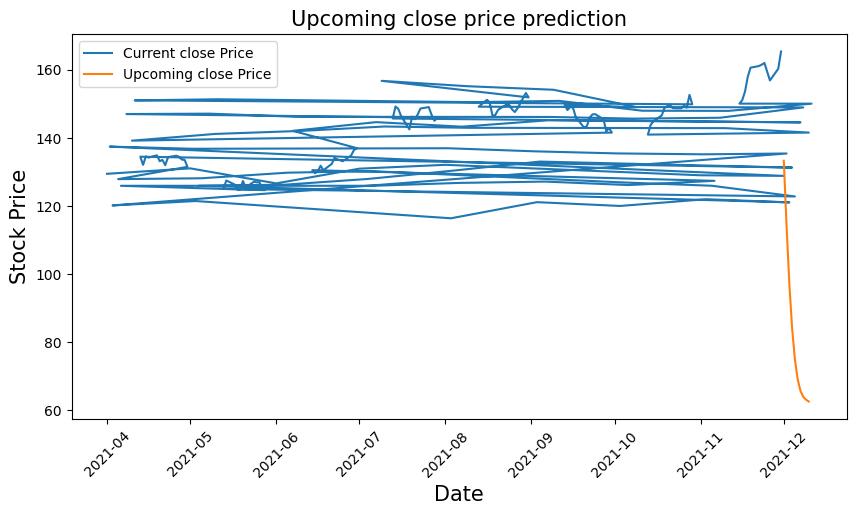

In [ ]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()